# **Intrusion Detection System using CNN & SVM**

Along the course of this notebook, we will try to develop 2 capable models using the Convolutional Neural Network (CNN) & Support Vector Machine (SVM) algorithms that are capable of distinguishing between benign packets and attacks.

## **Import libraries and datasets**
We used a concatenation of 2 datasets, one dataset with 2 classes *benign* and *DDoS*, and another dataset with 2 classes *benign* and *PortScan* to have a total of 3 classes.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, Flatten, Dense

# Load the dataset
df1 = pd.read_csv("Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df2 = pd.read_csv("Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df = pd.concat([df1, df2], axis=0)

## **Data Understanding**

In [2]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [3]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,512212.000000,5.122120e+05,512212.000000,512212.000000,512212.000000,5.122120e+05,512212.000000,512212.000000,512212.000000,512212.000000,...,512212.000000,512212.000000,5.122120e+05,5.122120e+05,5.122120e+05,5.122120e+05,5.122120e+05,5.122120e+05,5.122120e+05,5.122120e+05
mean,8412.769090,1.016663e+07,4.091019,3.984264,544.584561,4.141029e+03,282.666408,18.078026,86.143519,108.468259,...,2.426234,25.729085,1.005245e+05,1.853578e+04,1.352519e+05,9.042571e+04,5.445735e+06,1.626106e+06,6.596952e+06,4.277190e+06
std,17447.963843,2.712714e+07,17.841275,25.620921,2592.815800,4.619398e+04,1281.867186,110.274825,347.365649,544.842538,...,13.823547,7.601682,6.384489e+05,2.408144e+05,8.141741e+05,6.138496e+05,1.647327e+07,8.698206e+06,1.986544e+07,1.496171e+07
min,0.000000,-1.300000e+01,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.000000,5.500000e+01,1.000000,1.000000,2.000000,6.000000e+00,2.000000,0.000000,2.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,146.000000,3.027600e+04,2.000000,1.000000,26.000000,6.000000e+00,6.000000,2.000000,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5544.000000,2.033681e+06,4.000000,4.000000,62.000000,3.500000e+02,36.000000,6.000000,33.000000,6.094494,...,3.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65532.000000,1.199999e+08,3119.000000,3635.000000,232349.000000,7.150819e+06,13929.000000,1472.000000,3867.000000,6692.644993,...,2056.000000,60.000000,1.100000e+08,7.050000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.050000e+07,1.200000e+08,1.200000e+08


In [4]:
df.shape

(512212, 79)

## **Data Preparation**

### **Target Variable**
The target variable in our dataset is the the *Label* column. It's in the form of string, so we must encode it to a number to feed to our ML models later.

In [5]:
df[' Label'].value_counts()

BENIGN      225255
PortScan    158930
DDoS        128027
Name:  Label, dtype: int64

In [6]:
df = df.drop_duplicates()
df = df.dropna()

# Label Encoding the Target
target = df[' Label']
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(target)
df[' Label'] = encoded_labels

df = df[~np.isinf(df).any(axis=1)]

In [7]:
df[' Label'].value_counts()

0    216628
1    128014
2     90694
Name:  Label, dtype: int64

In [8]:
# Features and target variable
X = df.drop(' Label', axis=1)
y = df[' Label']

### **Scaler**
We scaled the data using the MinMaxScaler to get better accuracy once we obtain our models.

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
XMinMaxScaled = scaler.fit_transform(X)

In [10]:
XMinMaxScaled

array([[8.37224562e-01, 1.33333376e-07, 3.20718409e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.40108649e-01, 1.01666699e-06, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.40123909e-01, 5.41666838e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [6.76005616e-03, 1.34844209e-03, 2.21295702e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.76005616e-03, 1.19064204e-03, 1.57152021e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.76005616e-03, 1.55784216e-03, 1.44323284e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [11]:
df.shape

(435336, 79)

## **Modeling**

### **CNN Architecture**
We will begin by modeling the CNN architecture. Since we're working with CNN instead of ANN, we have to reshape our input data to a 2D array to mimick an image for the convolutional layer. Then we feed it to the model to train.

In [12]:
# Reshape the data for CNN
XMinMaxScaled = XMinMaxScaled.reshape(-1, 2, 39, 1)  # Assuming 78 columns, change if necessary

# Keras model
model = Sequential()

# Add 2D convolutional layers
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(2, 39, 1)))
model.add(BatchNormalization())
model.add(Flatten())
##### model.add(Dense(1, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))

# Compile the model
##### model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(XMinMaxScaled, y, test_size=0.2, random_state=42, stratify=y)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate accuracy on test data
accuracy = model.evaluate(X_test, y_test)[1]
print("Accuracy: %.2f%%" % (accuracy * 100))

Epoch 1/10
10884/10884 [==============================] - 15s 1ms/step - loss: 0.0197 - accuracy: 0.9933
Epoch 2/10
10884/10884 [==============================] - 14s 1ms/step - loss: 0.0069 - accuracy: 0.9980
Epoch 3/10
10884/10884 [==============================] - 13s 1ms/step - loss: 0.0042 - accuracy: 0.9991
Epoch 4/10
10884/10884 [==============================] - 14s 1ms/step - loss: 0.0040 - accuracy: 0.9991
Epoch 5/10
10884/10884 [==============================] - 14s 1ms/step - loss: 0.0033 - accuracy: 0.9993
Epoch 6/10
10884/10884 [==============================] - 14s 1ms/step - loss: 0.0029 - accuracy: 0.9994
Epoch 7/10
10884/10884 [==============================] - 14s 1ms/step - loss: 0.0029 - accuracy: 0.9993
Epoch 8/10
10884/10884 [==============================] - 14s 1ms/step - loss: 0.0029 - accuracy: 0.9994
Epoch 9/10
10884/10884 [==============================] - 14s 1ms/step - loss: 0.0026 - accuracy: 0.9994
Epoch 10/10
2721/2721 [==============================] 

In [13]:
y_test.value_counts()

0    43326
1    25603
2    18139
Name:  Label, dtype: int64

In [14]:
# Predict using the CNN model
predictions = model.predict(X_test)

# Convert softmax probabilities to class labels
y_pred = np.argmax(predictions, axis=1)

2721/2721 [==============================] - 2s 733us/step


In [15]:
y_pred

array([0, 0, 2, ..., 0, 0, 0], dtype=int64)

### **CNN Evaluation**

In [16]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, matthews_corrcoef

conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix: ", conf_matrix)
print("Classification Report", classification_report(y_test, y_pred))
print('F1 : ', f1_score(y_test, y_pred, average='macro'))
print('MCC : ', matthews_corrcoef(y_test, y_pred))

Confusion Matrix:  [[43310    11     5]
 [   17 25586     0]
 [   10     0 18129]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00     43326
           1       1.00      1.00      1.00     25603
           2       1.00      1.00      1.00     18139

    accuracy                           1.00     87068
   macro avg       1.00      1.00      1.00     87068
weighted avg       1.00      1.00      1.00     87068

F1 :  0.9995144731455002
MCC :  0.9992066355704332


Epoch 1/10
10884/10884 [==============================] - 16s 1ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0025 - val_accuracy: 0.9995
Epoch 2/10
10884/10884 [==============================] - 16s 1ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0029 - val_accuracy: 0.9995
Epoch 3/10
10884/10884 [==============================] - 16s 1ms/step - loss: 0.0051 - accuracy: 0.9986 - val_loss: 0.0053 - val_accuracy: 0.9993
Epoch 4/10
10884/10884 [==============================] - 16s 1ms/step - loss: 0.0043 - accuracy: 0.9991 - val_loss: 0.0039 - val_accuracy: 0.9993
Epoch 5/10
10884/10884 [==============================] - 16s 1ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0032 - val_accuracy: 0.9993
Epoch 6/10
10884/10884 [==============================] - 17s 2ms/step - loss: 0.0029 - accuracy: 0.9993 - val_loss: 0.0027 - val_accuracy: 0.9994
Epoch 7/10
10884/10884 [==============================] - 17s 2ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0

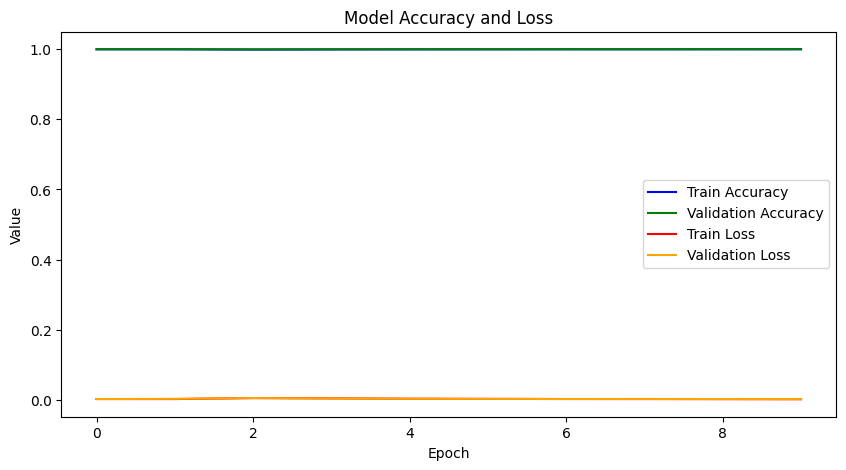

In [17]:
import matplotlib.pyplot as plt

# Train the model and keep the history object
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

### **CNN Deployment**

In [18]:
from tensorflow import lite

converter = lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('cnn_model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Bilal\AppData\Local\Temp\tmph0wfyx1o\assets


INFO:tensorflow:Assets written to: C:\Users\Bilal\AppData\Local\Temp\tmph0wfyx1o\assets


### **SVM Architecture**
After Using CNN to obtain a model to predict whether a request is an attack or not, We will try a different algorithm to see if it yields better/worse results

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

We should normalize the data before training the model for optimal results, this scaler is different than the one we used for CNN.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features (mean=0, variance=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [22]:
y_pred = svm_classifier.predict(X_test)

### **SVM Evaluation**

In [23]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
print(classification_report(y_test, y_pred))

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43326
           1       1.00      1.00      1.00     25603
           2       1.00      1.00      1.00     18139

    accuracy                           1.00     87068
   macro avg       1.00      1.00      1.00     87068
weighted avg       1.00      1.00      1.00     87068

Confusion Matrix:
[[43288    22    16]
 [   25 25578     0]
 [   24     1 18114]]


## **Future Works**
To simulate a live intrusion detection system, we need constant new requests being sent to the server. We can replicate this behaviour by generating new data by adding some noise to the data we have, which allows it to be never seen before by the models we created. The server will generate a new row each get request and will predict whether the generated row represents an attack or not.

### **Challenge**
Unfortunately, adding noise to this dataset doesn't work as well as in other cases. When adding the noise, the models heavily favor the attack class, which could be explained by abnormal data such as a floating number for a destination port. To generate new data, a different approach has to be taken and can be considered something to improve on for this project.

In [24]:
import random
import os
from flask import jsonify
import pandas as pd
import numpy as np

dataset_1 = pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
dataset_2 = pd.read_csv('Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
datasets = pd.concat([dataset_1, dataset_2], axis=0)

def add_noise(column, noise_level=0.1):
    noise = np.random.normal(0, noise_level, len(column))
    return column + noise

datasets.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [25]:
numeric_columns = datasets.select_dtypes(include=[np.number])
numeric_columns = numeric_columns.drop_duplicates()
numeric_columns = numeric_columns.dropna()
numeric_columns = numeric_columns[~np.isinf(numeric_columns).any(axis=1)]
numeric_columns

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,54865,3,2,0,12,0,6,6,6.000000,0.000000,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
1,55054,109,1,1,6,6,6,6,6.000000,0.000000,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
2,55055,52,1,1,6,6,6,6,6.000000,0.000000,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
3,46236,34,1,1,6,6,6,6,6.000000,0.000000,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
4,54863,3,2,0,12,0,6,6,6.000000,0.000000,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286462,443,196135,49,57,1331,105841,570,0,27.163265,108.067176,...,31,20,0.0,0.0,0,0,0.0,0.0,0,0
286463,443,378424,49,59,1325,104393,570,0,27.040816,108.095051,...,30,20,0.0,0.0,0,0,0.0,0.0,0,0
286464,443,161800,70,103,1427,215903,570,0,20.385714,90.746389,...,47,20,0.0,0.0,0,0,0.0,0.0,0,0
286465,443,142864,50,62,1331,110185,570,0,26.620000,107.027727,...,31,20,0.0,0.0,0,0,0.0,0.0,0,0


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(numeric_columns)

array([[8.37224562e-01, 1.33333376e-07, 3.20718409e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.40108649e-01, 1.01666699e-06, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.40123909e-01, 5.41666838e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [6.76005616e-03, 1.34844209e-03, 2.21295702e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.76005616e-03, 1.19064204e-03, 1.57152021e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.76005616e-03, 1.55784216e-03, 1.44323284e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [27]:
#noised_columns = numeric_columns.apply(add_noise, noise_level=1)
#noised_columns.shape

### **CNN Load and Use the Model**
this section covers what happens in the backend. We load the model and give predictions after scaling the input data and reshaping it to fit the CNN architecture we built.

In [29]:
from tensorflow import lite

interpreter = lite.Interpreter(model_path='cnn_model.tflite')
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

Here we are retrieving a random row from our dataset, then we transform it using the scaler and reshape it to fit the CNN architecture.

In [28]:
new_row = numeric_columns.iloc[random.randint(0, len(numeric_columns)-1)]
new_row = new_row.values.reshape(1, -1)
new_rowScaled = scaler.transform(new_row)
new_rowScaled = new_rowScaled.reshape((1, 2, 39, 1))
new_rowScaled.shape

c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


(1, 2, 39, 1)

In [30]:
input_data = new_rowScaled.astype(np.float32)
#input_data = X_test[0].astype(np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

output_data = interpreter.get_tensor(output_details[0]['index'])

output_data

array([[2.3766226e-08, 6.1081979e-14, 1.0000000e+00]], dtype=float32)

In [31]:
predicted_class = np.argmax(output_data)

print("Predicted Class Index:", predicted_class)
predictions = ['BENIGN', 'PortScan', 'DDoS']
print("Predicted Class:", predictions[predicted_class])

Predicted Class Index: 2
Predicted Class: DDoS
